In [1]:
import numpy as np

In [2]:
b = np.load('C:/Arpit/shapenet_cars_chairs_planes_20views/Chair/1a8bbf2994788e2743e99e0cae970928/03001627_1a8bbf2994788e2743e99e0cae970928_view000_gt_rotvox_samescale_128.npz')

In [3]:
print(b.files)

['voxel']


In [4]:
b['voxel'].shape


(128, 128, 128)

In [10]:
import cv2
z = cv2.resize(b['voxel'], (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
temp_arr = np.dstack(z)
z2 = cv2.resize(temp_arr, (0, 0), fx=0.5, fy=1, interpolation=cv2.INTER_AREA)
z3 = np.transpose(z2,(0,2,1))

In [11]:
from scipy.ndimage import zoom
d = zoom(b['voxel'],0.5)

In [12]:
print(d.shape)

(64, 64, 64)


In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

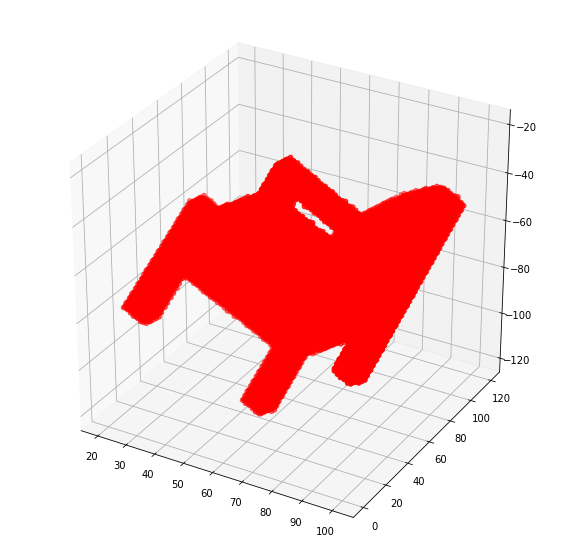

In [14]:
z,x,y = b['voxel'].nonzero()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red')
#ax.view_init(azim=-180)
plt.show()

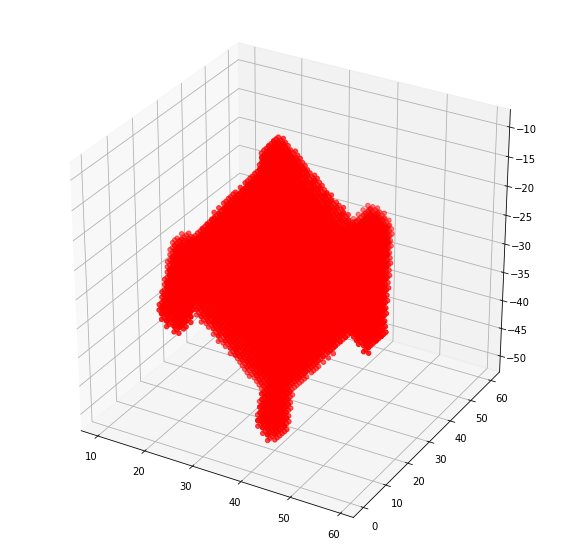

In [15]:
z,x,y = z3.nonzero()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

In [16]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

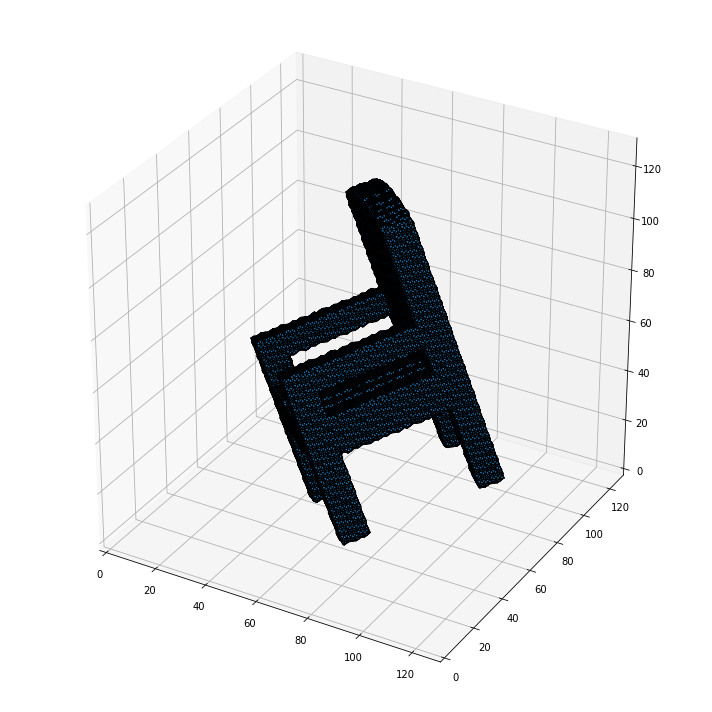

In [17]:
verts, faces, normals, values = measure.marching_cubes_lewiner(b['voxel'], 0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlim(0, 128) 
ax.set_ylim(0, 128)  
ax.set_zlim(0, 128)  

plt.tight_layout()
plt.show()

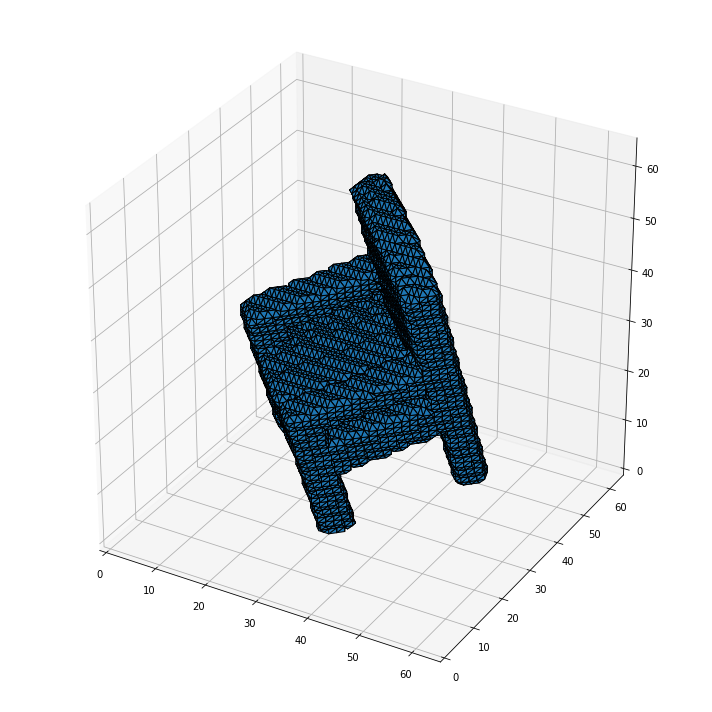

In [18]:
verts, faces, normals, values = measure.marching_cubes_lewiner(z3, 0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlim(0, 64) 
ax.set_ylim(0, 64)  
ax.set_zlim(0, 64)  

plt.tight_layout()
plt.show()